In [0]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("FileCVS").getOrCreate()

In [0]:
df=spark.read.csv('/FileStore/tables/titanic.csv',sep=',',header=True)
df.show()
df.columns

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [0]:
df.fillna(0)

Out[188]: DataFrame[PassengerId: string, Survived: string, Pclass: string, Name: string, Sex: string, Age: string, SibSp: string, Parch: string, Ticket: string, Fare: string, Cabin: string, Embarked: string]

In [0]:
df1_casted=df.select(df.Survived.cast('float'),df.Pclass.cast('float'),df.Sex,df.Age.cast('float'))

In [0]:
df1_casted.printSchema()

root
 |-- Survived: float (nullable = true)
 |-- Pclass: float (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: float (nullable = true)



In [0]:
df1_casted.describe().show()

+-------+-------------------+------------------+------+------------------+
|summary|           Survived|            Pclass|   Sex|               Age|
+-------+-------------------+------------------+------+------------------+
|  count|                891|               891|   891|               714|
|   mean| 0.3838383838383838| 2.308641975308642|  null| 29.69911764704046|
| stddev|0.48659245426485753|0.8360712409770491|  null|14.526497332370992|
|    min|                0.0|               1.0|female|              0.42|
|    max|                1.0|               3.0|  male|              80.0|
+-------+-------------------+------------------+------+------------------+



In [0]:
df1NA=df1_casted.fillna(0)

In [0]:
df1NA.show()

+--------+------+------+----+
|Survived|Pclass|   Sex| Age|
+--------+------+------+----+
|     0.0|   3.0|  male|22.0|
|     1.0|   1.0|female|38.0|
|     1.0|   3.0|female|26.0|
|     1.0|   1.0|female|35.0|
|     0.0|   3.0|  male|35.0|
|     0.0|   3.0|  male| 0.0|
|     0.0|   1.0|  male|54.0|
|     0.0|   3.0|  male| 2.0|
|     1.0|   3.0|female|27.0|
|     1.0|   2.0|female|14.0|
|     1.0|   3.0|female| 4.0|
|     1.0|   1.0|female|58.0|
|     0.0|   3.0|  male|20.0|
|     0.0|   3.0|  male|39.0|
|     0.0|   3.0|female|14.0|
|     1.0|   2.0|female|55.0|
|     0.0|   3.0|  male| 2.0|
|     1.0|   2.0|  male| 0.0|
|     0.0|   3.0|female|31.0|
|     1.0|   3.0|female| 0.0|
+--------+------+------+----+
only showing top 20 rows



In [0]:
df1_group=df1NA.groupby("sex").mean()

In [0]:
df1_group.show()

+------+-------------------+-----------------+------------------+
|   sex|      avg(Survived)|      avg(Pclass)|          avg(Age)|
+------+-------------------+-----------------+------------------+
|female| 0.7420382165605095|2.159235668789809|23.203821656050955|
|  male|0.18890814558058924|2.389948006932409|24.123344887325626|
+------+-------------------+-----------------+------------------+



In [0]:
df_select=df1NA.groupby("sex").sum("survived")

In [0]:
df_select.show()

+------+-------------+
|   sex|sum(survived)|
+------+-------------+
|female|        233.0|
|  male|        109.0|
+------+-------------+



In [0]:
import matplotlib.pyplot as plt 
pd=df_select.toPandas()

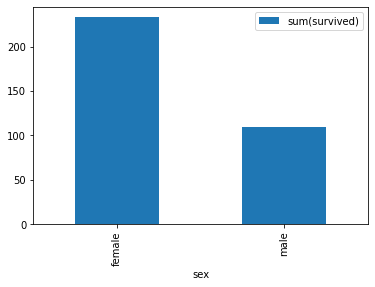

In [0]:
pd.plot(kind="bar",x="sex",y="sum(survived)")
plt.show()

In [0]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="Sex",outputCol="sex_num")
df_trans=indexer.fit(df1NA).transform(df1NA)
df_trans.show()

+--------+------+------+----+-------+
|Survived|Pclass|   Sex| Age|sex_num|
+--------+------+------+----+-------+
|     0.0|   3.0|  male|22.0|    0.0|
|     1.0|   1.0|female|38.0|    1.0|
|     1.0|   3.0|female|26.0|    1.0|
|     1.0|   1.0|female|35.0|    1.0|
|     0.0|   3.0|  male|35.0|    0.0|
|     0.0|   3.0|  male| 0.0|    0.0|
|     0.0|   1.0|  male|54.0|    0.0|
|     0.0|   3.0|  male| 2.0|    0.0|
|     1.0|   3.0|female|27.0|    1.0|
|     1.0|   2.0|female|14.0|    1.0|
|     1.0|   3.0|female| 4.0|    1.0|
|     1.0|   1.0|female|58.0|    1.0|
|     0.0|   3.0|  male|20.0|    0.0|
|     0.0|   3.0|  male|39.0|    0.0|
|     0.0|   3.0|female|14.0|    1.0|
|     1.0|   2.0|female|55.0|    1.0|
|     0.0|   3.0|  male| 2.0|    0.0|
|     1.0|   2.0|  male| 0.0|    0.0|
|     0.0|   3.0|female|31.0|    1.0|
|     1.0|   3.0|female| 0.0|    1.0|
+--------+------+------+----+-------+
only showing top 20 rows



In [0]:
from pyspark.ml.feature import IndexToString
converter=IndexToString(inputCol="sex_num",outputCol="sex_label")
df_transConv=converter.transform(df_trans)
df_transConv.show()

+--------+------+------+----+-------+---------+
|Survived|Pclass|   Sex| Age|sex_num|sex_label|
+--------+------+------+----+-------+---------+
|     0.0|   3.0|  male|22.0|    0.0|     male|
|     1.0|   1.0|female|38.0|    1.0|   female|
|     1.0|   3.0|female|26.0|    1.0|   female|
|     1.0|   1.0|female|35.0|    1.0|   female|
|     0.0|   3.0|  male|35.0|    0.0|     male|
|     0.0|   3.0|  male| 0.0|    0.0|     male|
|     0.0|   1.0|  male|54.0|    0.0|     male|
|     0.0|   3.0|  male| 2.0|    0.0|     male|
|     1.0|   3.0|female|27.0|    1.0|   female|
|     1.0|   2.0|female|14.0|    1.0|   female|
|     1.0|   3.0|female| 4.0|    1.0|   female|
|     1.0|   1.0|female|58.0|    1.0|   female|
|     0.0|   3.0|  male|20.0|    0.0|     male|
|     0.0|   3.0|  male|39.0|    0.0|     male|
|     0.0|   3.0|female|14.0|    1.0|   female|
|     1.0|   2.0|female|55.0|    1.0|   female|
|     0.0|   3.0|  male| 2.0|    0.0|     male|
|     1.0|   2.0|  male| 0.0|    0.0|   

In [0]:
from pyspark.ml.feature import IndexToString
converter=IndexToString(inputCol="Pclass",outputCol="label_class",labels=["P0","premuim","business","economic"])
df_transConv=converter.transform(df1NA)

In [0]:
df_transConv.show()

+--------+------+------+----+-----------+
|Survived|Pclass|   Sex| Age|label_class|
+--------+------+------+----+-----------+
|     0.0|   3.0|  male|22.0|   economic|
|     1.0|   1.0|female|38.0|    premuim|
|     1.0|   3.0|female|26.0|   economic|
|     1.0|   1.0|female|35.0|    premuim|
|     0.0|   3.0|  male|35.0|   economic|
|     0.0|   3.0|  male| 0.0|   economic|
|     0.0|   1.0|  male|54.0|    premuim|
|     0.0|   3.0|  male| 2.0|   economic|
|     1.0|   3.0|female|27.0|   economic|
|     1.0|   2.0|female|14.0|   business|
|     1.0|   3.0|female| 4.0|   economic|
|     1.0|   1.0|female|58.0|    premuim|
|     0.0|   3.0|  male|20.0|   economic|
|     0.0|   3.0|  male|39.0|   economic|
|     0.0|   3.0|female|14.0|   economic|
|     1.0|   2.0|female|55.0|   business|
|     0.0|   3.0|  male| 2.0|   economic|
|     1.0|   2.0|  male| 0.0|   business|
|     0.0|   3.0|female|31.0|   economic|
|     1.0|   3.0|female| 0.0|   economic|
+--------+------+------+----+-----

In [0]:
from pyspark.ml.feature import OneHotEncoder
oneHottran=OneHotEncoder(inputCol='Survived',outputCol="survivedOneHot")
df_transOneHot=oneHottran.fit(df1NA).transform(df1NA)
df_transOneHot.show()

+--------+------+------+----+--------------+
|Survived|Pclass|   Sex| Age|survivedOneHot|
+--------+------+------+----+--------------+
|     0.0|   3.0|  male|22.0| (1,[0],[1.0])|
|     1.0|   1.0|female|38.0|     (1,[],[])|
|     1.0|   3.0|female|26.0|     (1,[],[])|
|     1.0|   1.0|female|35.0|     (1,[],[])|
|     0.0|   3.0|  male|35.0| (1,[0],[1.0])|
|     0.0|   3.0|  male| 0.0| (1,[0],[1.0])|
|     0.0|   1.0|  male|54.0| (1,[0],[1.0])|
|     0.0|   3.0|  male| 2.0| (1,[0],[1.0])|
|     1.0|   3.0|female|27.0|     (1,[],[])|
|     1.0|   2.0|female|14.0|     (1,[],[])|
|     1.0|   3.0|female| 4.0|     (1,[],[])|
|     1.0|   1.0|female|58.0|     (1,[],[])|
|     0.0|   3.0|  male|20.0| (1,[0],[1.0])|
|     0.0|   3.0|  male|39.0| (1,[0],[1.0])|
|     0.0|   3.0|female|14.0| (1,[0],[1.0])|
|     1.0|   2.0|female|55.0|     (1,[],[])|
|     0.0|   3.0|  male| 2.0| (1,[0],[1.0])|
|     1.0|   2.0|  male| 0.0|     (1,[],[])|
|     0.0|   3.0|female|31.0| (1,[0],[1.0])|
|     1.0|

In [0]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import IntegerType

In [0]:
categories = df1NA.select("Sex").distinct().rdd.flatMap(lambda x :x).collect()
categories.sort()
for category in categories :
    function = udf(lambda item : 1 if item==category else 0 , IntegerType())
    new_column_name='Sex'+'_'+category
    df1NA_onehot=df1NA.withColumn(new_column_name,function(col('Sex')))
df1NA_onehot.show()

+--------+------+------+----+--------+
|Survived|Pclass|   Sex| Age|Sex_male|
+--------+------+------+----+--------+
|     0.0|   3.0|  male|22.0|       1|
|     1.0|   1.0|female|38.0|       0|
|     1.0|   3.0|female|26.0|       0|
|     1.0|   1.0|female|35.0|       0|
|     0.0|   3.0|  male|35.0|       1|
|     0.0|   3.0|  male| 0.0|       1|
|     0.0|   1.0|  male|54.0|       1|
|     0.0|   3.0|  male| 2.0|       1|
|     1.0|   3.0|female|27.0|       0|
|     1.0|   2.0|female|14.0|       0|
|     1.0|   3.0|female| 4.0|       0|
|     1.0|   1.0|female|58.0|       0|
|     0.0|   3.0|  male|20.0|       1|
|     0.0|   3.0|  male|39.0|       1|
|     0.0|   3.0|female|14.0|       0|
|     1.0|   2.0|female|55.0|       0|
|     0.0|   3.0|  male| 2.0|       1|
|     1.0|   2.0|  male| 0.0|       1|
|     0.0|   3.0|female|31.0|       0|
|     1.0|   3.0|female| 0.0|       0|
+--------+------+------+----+--------+
only showing top 20 rows



In [0]:
#Tokenizer 
from pyspark.ml.feature import Tokenizer 
spark= SparkSession.builder.appName("exemple2").getOrCreate()
enregistrement=[{'Description':'RABBIT NIGHT LIGHT '},{'Description':'DOUGHNUT LIP GLOSS'}]
df1=spark.createDataFrame(enregistrement)
df1.show()

+-------------------+
|        Description|
+-------------------+
|RABBIT NIGHT LIGHT |
| DOUGHNUT LIP GLOSS|
+-------------------+



In [0]:
tkn=Tokenizer(inputCol="Description",outputCol="Descout")
df2=tkn.transform(df1)
df2.toPandas().head()

,Description,Descout
0,RABBIT NIGHT LIGHT,"[rabbit, night, light]"
1,DOUGHNUT LIP GLOSS,"[doughnut, lip, gloss]"


In [0]:
from pyspark.ml.feature import  RegexTokenizer
rt=RegexTokenizer().setInputCol("Description").setOutputCol("DescOut2").setPattern("i").setToLowercase(True)
rt.transform(df1).toPandas().head()

,Description,DescOut2
0,RABBIT NIGHT LIGHT,"[rabb, t n, ght l, ght ]"
1,DOUGHNUT LIP GLOSS,"[doughnut l, p gloss]"


In [0]:
from pyspark.ml.feature import Word2Vec
documentPDF= spark.createDataFrame([
     ("Hi I heard about spark".split(" "), ),
     ("I wish Java could use case classes".split(" "), ),                           
     ("Logistic regression models are neat".split(" "), ) ]
    , ["text"])

word2vec=Word2Vec(vectorSize=3,minCount=1,inputCol="text",outputCol="result")
model=word2vec.fit(documentPDF)
result=model.transform(documentPDF)
result.show(3,False)

+------------------------------------------+-----------------------------------------------------------------+
|text                                      |result                                                           |
+------------------------------------------+-----------------------------------------------------------------+
|[Hi, I, heard, about, spark]              |[0.012264367192983627,-0.06442034244537354,-0.007622340321540833]|
|[I, wish, Java, could, use, case, classes]|[0.05160687722465289,0.025969027541577816,0.02736483487699713]   |
|[Logistic, regression, models, are, neat] |[-0.06564115285873413,0.02060299552977085,-0.08455150425434113]  |
+------------------------------------------+-----------------------------------------------------------------+



In [0]:
#Normalisation 
#MinMaxScaler
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
enregistrement=[{"X":70},{"X":80},{"X":120}]
df1=spark.createDataFrame(enregistrement)
assembler=VectorAssembler(inputCols=["X"],outputCol="X_feature")
df2=assembler.transform(df1)
df1.printSchema()

scaler =MinMaxScaler(inputCol="X_feature",outputCol="X_scaler")
scalerModel=scaler.fit(df2)
scalerData=scalerModel.transform(df2)

scalerData.show()

root
 |-- X: long (nullable = true)

+---+---------+--------+
|  X|X_feature|X_scaler|
+---+---------+--------+
| 70|   [70.0]|   [0.0]|
| 80|   [80.0]|   [0.2]|
|120|  [120.0]|   [1.0]|
+---+---------+--------+



In [0]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler, StringIndexer
df_Iris = spark.read.csv('/FileStore/tables/Iris.csv',sep=',',header=True)

In [0]:
df_Iris.show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-

In [0]:
df_Iris.printSchema()

root
 |-- Id: string (nullable = true)
 |-- SepalLengthCm: string (nullable = true)
 |-- SepalWidthCm: string (nullable = true)
 |-- PetalLengthCm: string (nullable = true)
 |-- PetalWidthCm: string (nullable = true)
 |-- Species: string (nullable = true)



+---+-------------+------------+-------------+------------+-----------+-----+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|Label|
+---+-------------+------------+-------------+------------+-----------+-----+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|  0.0|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|  0.0|
+---+-------------+------------+-------------+------------+-----------+-----+
only showing top 2 rows



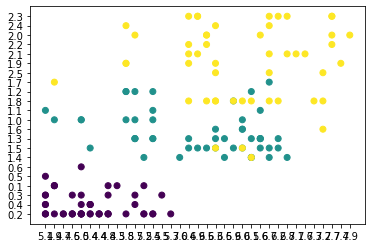

In [0]:
encoder=StringIndexer(inputCol="Species",outputCol="Label")
df22=encoder.fit(df_Iris).transform(df_Iris)
pd1=df22.toPandas()
df22.show(2)
plt.scatter(pd1.iloc[:,1],pd1.iloc[:,4],c=pd1.iloc[:,6])
plt.show()

In [0]:
df22=df22.select(df22.SepalLengthCm.cast('float'),df22.SepalWidthCm.cast('float'),df22.PetalLengthCm.cast('float'),df22.PetalWidthCm.cast('float'),df22.Species.cast('float'),df22.Label.cast('float'))

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType

assembler=VectorAssembler(inputCols=["SepalLengthCm","PetalLengthCm"],outputCol="features")
df3=assembler.transform(df22)

scaler =MinMaxScaler(inputCol="features",outputCol="features_scaler")
scalerModel=scaler.fit(df3)
scalerData=scalerModel.transform(df3)

df4=scalerData.select("SepalLengthCm","PetalLengthCm","features","features_scaler","Label")
df4.select(["features_scaler","Label"]).show(3)

Sepal_L=F.udf(lambda r : r.toArray().tolist()[0],DoubleType())
Petal_L=F.udf(lambda r : r.toArray().tolist()[1],DoubleType())
df4=df4.withColumn('Sepal_L',Sepal_L('features_scaler'))
df4=df4.withColumn('Petal_L',Petal_L('features_scaler'))
df5=df4.select(['Sepal_L','Petal_L','Label'])
df5.show(3)


+--------------------+-----+
|     features_scaler|Label|
+--------------------+-----+
|[0.22222214863623...|  0.0|
|[0.16666664459087...|  0.0|
|[0.11111100809073...|  0.0|
+--------------------+-----+
only showing top 3 rows

+-------------------+-------------------+-----+
|            Sepal_L|            Petal_L|Label|
+-------------------+-------------------+-----+
|0.22222214863623904|0.06779660503263626|  0.0|
|0.16666664459087172|0.06779660503263626|  0.0|
| 0.1111110080907347| 0.0508474487232362|  0.0|
+-------------------+-------------------+-----+
only showing top 3 rows



+-------------------+-------------------+-----+
|            Sepal_L|            Petal_L|Label|
+-------------------+-------------------+-----+
|0.22222214863623904|0.06779660503263626|  0.0|
|0.16666664459087172|0.06779660503263626|  0.0|
+-------------------+-------------------+-----+
only showing top 2 rows



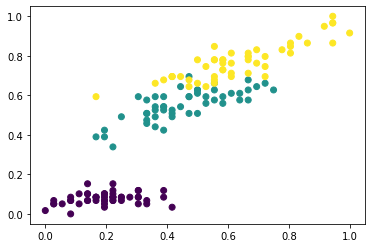

In [0]:
pd=df5.toPandas()
df5.show(2)
plt.scatter(pd.iloc[:,0],pd.iloc[:,1],c=pd.iloc[:,2])
plt.show()

In [0]:
#StanderScaler
from pyspark.ml.feature import StandardScaler, VectorAssembler
enregistrement=[{"X":70},{"X":80},{"X":120}]
df11=spark.createDataFrame(enregistrement)
assembler=VectorAssembler(inputCols=["X"],outputCol="X_feature")
df2=assembler.transform(df11)
df11.printSchema()

scaler =StandardScaler(inputCol="X_feature",outputCol="X_scaler")
scalerModel=scaler.fit(df2)
scalerData=scalerModel.transform(df2)

scalerData.show()

root
 |-- X: long (nullable = true)

+---+---------+--------------------+
|  X|X_feature|            X_scaler|
+---+---------+--------------------+
| 70|   [70.0]|[2.6457513110645903]|
| 80|   [80.0]|[3.0237157840738176]|
|120|  [120.0]| [4.535573676110727]|
+---+---------+--------------------+



In [0]:
#StandardScaler
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType

assembler=VectorAssembler(inputCols=["SepalLengthCm","PetalLengthCm"],outputCol="features")
df3=assembler.transform(df22)

scaler =StandardScaler(inputCol="features",outputCol="features_scaler")
scalerModel=scaler.fit(df3)
scalerData=scalerModel.transform(df3)

df4=scalerData.select("SepalLengthCm","PetalLengthCm","features","features_scaler","Label")
df4.select(["features_scaler","Label"]).show(3)

Sepal_L=F.udf(lambda r : r.toArray().tolist()[0],DoubleType())
Petal_L=F.udf(lambda r : r.toArray().tolist()[1],DoubleType())
df4=df4.withColumn('Sepal_L',Sepal_L('features_scaler'))
df4=df4.withColumn('Petal_L',Petal_L('features_scaler'))
df5=df4.select(['Sepal_L','Petal_L','Label'])
df5.show(3)

+--------------------+-----+
|     features_scaler|Label|
+--------------------+-----+
|[6.15892840615775...|  0.0|
|[5.91740202781600...|  0.0|
|[5.67587507362994...|  0.0|
+--------------------+-----+
only showing top 3 rows

+-----------------+------------------+-----+
|          Sepal_L|           Petal_L|Label|
+-----------------+------------------+-----+
|6.158928406157753|0.7934616742740481|  0.0|
|5.917402027816001|0.7934616742740481|  0.0|
|5.675875073629941|0.7367858259195746|  0.0|
+-----------------+------------------+-----+
only showing top 3 rows



+-----------------+------------------+-----+
|          Sepal_L|           Petal_L|Label|
+-----------------+------------------+-----+
|6.158928406157753|0.7934616742740481|  0.0|
|5.917402027816001|0.7934616742740481|  0.0|
+-----------------+------------------+-----+
only showing top 2 rows



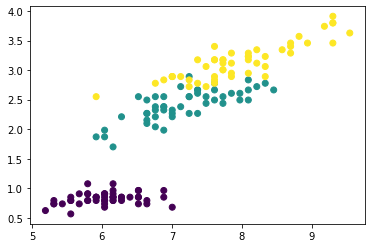

In [0]:
pd=df5.toPandas()
df5.show(2)
plt.scatter(pd.iloc[:,0],pd.iloc[:,1],c=pd.iloc[:,2])
plt.show()

In [0]:
# VALEUR ABERRANTES
df_Iris=df_Iris.select(df_Iris.SepalLengthCm.cast('float'),df_Iris.SepalWidthCm.cast('float'),df_Iris.PetalLengthCm.cast('float'),df_Iris.PetalWidthCm.cast('float'))

In [0]:
df_Iris.show(3)
pd_df_Iris=df_Iris.toPandas()

+-------------+------------+-------------+------------+
|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|
+-------------+------------+-------------+------------+
|          5.1|         3.5|          1.4|         0.2|
|          4.9|         3.0|          1.4|         0.2|
|          4.7|         3.2|          1.3|         0.2|
+-------------+------------+-------------+------------+
only showing top 3 rows



In [0]:
import numpy as np
outliers = np.full((5,4),20)+np.random.randn(5,4)


In [0]:
print(outliers)

[[20.6972743  20.81855566 19.59032989 17.90749498]
 [20.98606478 22.33517171 20.41430913 19.66092453]
 [19.77137777 18.51413476 20.12762026 19.07538602]
 [20.63790126 19.26097441 19.88312894 19.89175327]
 [20.17648347 18.34075403 19.66534094 20.73768835]]


In [0]:
df_out=spark.createDataFrame(outliers.tolist())
df_Iris_outliers=df_Iris.union(df_out)
pd_Iris_outliers=df_Iris_outliers.toPandas()


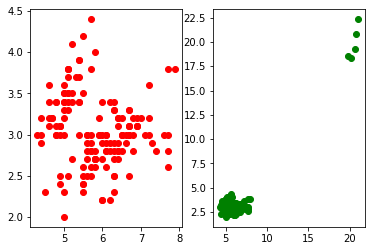

In [0]:
fig=plt.figure()
ax1= fig.add_subplot(121)
ax2= fig.add_subplot(122)

ax1.scatter(pd_df_Iris.iloc[:,0],pd_df_Iris.iloc[:,1],c='red')
ax2.scatter(pd_Iris_outliers.iloc[:,0],pd_Iris_outliers.iloc[:,1],c='green')
plt.show()


In [0]:
assembler =VectorAssembler(inputCols=['SepalLengthCm','PetalLengthCm'],outputCol="features")
df_assem=assembler.transform(df_Iris_outliers)

scalerStand=StandardScaler(inputCol="features",outputCol="features_scaler")
scalerModelStand=scalerStand.fit(df_assem)
scalerData=scalerModelStand.transform(df_assem)
dfStand=scalerData.select('features_scaler')

dfStand=dfStand.withColumn('Sepal_L',Sepal_L('features_scaler'))
dfStand=dfStand.withColumn('Petal_L',Petal_L('features_scaler'))
dfStand=dfStand.select(['Sepal_L','Petal_L'])
pdStand = dfStand.toPandas()
pdStand.head()

,Sepal_L,Petal_L
0,1.877775,0.41762
1,1.804136,0.41762
2,1.730498,0.38779
3,1.693679,0.44745
4,1.840956,0.41762


In [0]:
#Appliquer MinMax
scalerMinMax=MinMaxScaler(inputCol="features",outputCol="features_scaler")
scalerModelMinMax=scalerMinMax.fit(df_assem)
scalerDataMinMax=scalerModelMinMax.transform(df_assem)
dfMinMax=scalerDataMinMax.select('features_scaler')

dfMinMax=dfMinMax.withColumn('Sepal_L',Sepal_L('features_scaler'))
dfMinMax=dfMinMax.withColumn('Petal_L',Petal_L('features_scaler'))
dfMinMax=dfMinMax.select(['Sepal_L','Petal_L'])
pdMinMax = dfMinMax.toPandas()
pdMinMax.head()

,Sepal_L,Petal_L
0,0.047944,0.020603
1,0.035958,0.020603
2,0.023972,0.015453
3,0.017979,0.025754
4,0.041951,0.020603


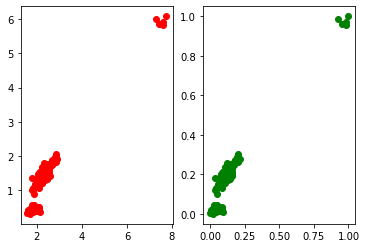

In [0]:
fig=plt.figure()
ax1= fig.add_subplot(121)
ax2= fig.add_subplot(122)

ax1.scatter(pdStand.iloc[:,0],pdStand.iloc[:,1],c='red')
ax2.scatter(pdMinMax.iloc[:,0],pdMinMax.iloc[:,1],c='green')
plt.show()

In [0]:
# Nettoyage ****************************************
df1_casted.describe(["Age","Survived"]).show()

+-------+------------------+-------------------+
|summary|               Age|           Survived|
+-------+------------------+-------------------+
|  count|               714|                891|
|   mean| 29.69911764704046| 0.3838383838383838|
| stddev|14.526497332370992|0.48659245426485753|
|    min|              0.42|                0.0|
|    max|              80.0|                1.0|
+-------+------------------+-------------------+



In [0]:
df1_casted.show(4)

+--------+------+------+----+
|Survived|Pclass|   Sex| Age|
+--------+------+------+----+
|     0.0|   3.0|  male|22.0|
|     1.0|   1.0|female|38.0|
|     1.0|   3.0|female|26.0|
|     1.0|   1.0|female|35.0|
+--------+------+------+----+
only showing top 4 rows



In [0]:
data_agg=df1_casted.agg(*[F.count(F.when(F.isnull(c),c)).alias(c) for c in df1_casted.columns])
data_agg.show()

+--------+------+---+---+
|Survived|Pclass|Sex|Age|
+--------+------+---+---+
|       0|     0|  0|177|
+--------+------+---+---+



In [0]:
df_select=df1_casted.select(["Age","Survived"])
df_select.describe().show()

df_net=df_select.filter(df1_casted.Age!='Nan')
df_net.describe().show()

+-------+------------------+-------------------+
|summary|               Age|           Survived|
+-------+------------------+-------------------+
|  count|               714|                891|
|   mean| 29.69911764704046| 0.3838383838383838|
| stddev|14.526497332370992|0.48659245426485753|
|    min|              0.42|                0.0|
|    max|              80.0|                1.0|
+-------+------------------+-------------------+

+-------+------------------+------------------+
|summary|               Age|          Survived|
+-------+------------------+------------------+
|  count|               714|               714|
|   mean| 29.69911764704046|0.4061624649859944|
| stddev|14.526497332370992|0.4914598643353704|
|    min|              0.42|               0.0|
|    max|              80.0|               1.0|
+-------+------------------+------------------+



In [0]:
df_net_1=df_select.dropna()
df_net_1.describe().show()

+-------+------------------+------------------+
|summary|               Age|          Survived|
+-------+------------------+------------------+
|  count|               714|               714|
|   mean| 29.69911764704046|0.4061624649859944|
| stddev|14.526497332370992|0.4914598643353704|
|    min|              0.42|               0.0|
|    max|              80.0|               1.0|
+-------+------------------+------------------+



In [0]:
#technique : Imputation 
from pyspark.ml.feature import Imputer

df=spark.createDataFrame([
    (1.0,float("nan")),
    (2.0,float("nan")),
    (float("nan"),3.0),
    (4.0,4.0),
    (5.0,5.0)],
    ["a","b"]
)
imputer=Imputer(inputCols=["a","b"],outputCols=["out_a","out_b"])
model=imputer.fit(df)
model.transform(df).show()

+---+---+-----+-----+
|  a|  b|out_a|out_b|
+---+---+-----+-----+
|1.0|NaN|  1.0|  4.0|
|2.0|NaN|  2.0|  4.0|
|NaN|3.0|  3.0|  3.0|
|4.0|4.0|  4.0|  4.0|
|5.0|5.0|  5.0|  5.0|
+---+---+-----+-----+



In [0]:
#Pipeline **********************************

from pyspark.ml import Pipeline

sample_df=spark.createDataFrame([
    (1,"L101","R"),
    (2,"L201","C"),
   (3,"D111","R"),
   (4,"F220","R"),
    (5,"D110","C")],
    ["id","category_1","category_2"]
)

sample_df.show()

+---+----------+----------+
| id|category_1|category_2|
+---+----------+----------+
|  1|      L101|         R|
|  2|      L201|         C|
|  3|      D111|         R|
|  4|      F220|         R|
|  5|      D110|         C|
+---+----------+----------+



In [0]:
from pyspark.ml.feature import OneHotEncoder

stage_1=StringIndexer(inputCol="category_1",outputCol="category_1_index")
stage_2=StringIndexer(inputCol="category_2",outputCol="category_2_index")
stage_2=StringIndexer(inputCol="category_2",outputCol="category_2_index")

stage_3=OneHotEncoder(inputCol='category_2_index',outputCol="category_2_OHE")

pipeline= Pipeline(stages=[stage_1,stage_2,stage_3])

pipeline_model=pipeline.fit(sample_df)
sample_df_updated=pipeline_model.transform(sample_df)

sample_df_updated.show()


+---+----------+----------+----------------+----------------+--------------+
| id|category_1|category_2|category_1_index|category_2_index|category_2_OHE|
+---+----------+----------+----------------+----------------+--------------+
|  1|      L101|         R|             3.0|             0.0| (1,[0],[1.0])|
|  2|      L201|         C|             4.0|             1.0|     (1,[],[])|
|  3|      D111|         R|             1.0|             0.0| (1,[0],[1.0])|
|  4|      F220|         R|             2.0|             0.0| (1,[0],[1.0])|
|  5|      D110|         C|             0.0|             1.0|     (1,[],[])|
+---+----------+----------+----------------+----------------+--------------+



+--------+-----+
|features|label|
+--------+-----+
|       a|    1|
|       b|    1|
|       c|    1|
|       d|    1|
|       e|    1|
|       f|    1|
|       x|    1|
|       y|    0|
+--------+-----+

8
1    7
0    1
Name: label, dtype: int64
Out[239]: <AxesSubplot:title={'center':'count(label)'}>

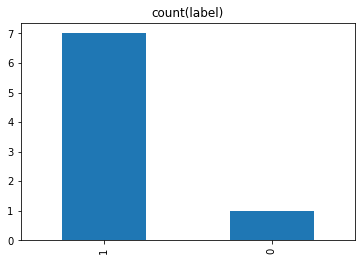

In [0]:
#Données non équilibré
df=spark.createDataFrame([["a",1],["b",1],["c",1],["d",1],["e",1],["f",1],["x",1],["y",0]],["features","label"])
df.show()
print(df.count())

pd=df.toPandas()['label'].value_counts()
print(pd)
pd.plot(kind="bar",title="count(label)")


In [0]:
#Donnes non équilibré 
#premiere solution : OverSampling
from pyspark.sql.functions import explode,col, array, lit
major_df=df.filter(df.label==1)
minor_df=df.filter(df.label==0)
ratio=round(major_df.count()/minor_df.count())
print("ratio : {}".format(ratio))

a=range(ratio)

oversampled_df=minor_df.withColumn("dummy",explode(array([lit(x) for x in a ])))

oversampled_df.show()

combined_df=major_df.unionAll(oversampled_df.drop('dummy'))

combined_df.show()

ratio : 7
+--------+-----+-----+
|features|label|dummy|
+--------+-----+-----+
|       y|    0|    0|
|       y|    0|    1|
|       y|    0|    2|
|       y|    0|    3|
|       y|    0|    4|
|       y|    0|    5|
|       y|    0|    6|
+--------+-----+-----+

+--------+-----+
|features|label|
+--------+-----+
|       a|    1|
|       b|    1|
|       c|    1|
|       d|    1|
|       e|    1|
|       f|    1|
|       x|    1|
|       y|    0|
|       y|    0|
|       y|    0|
|       y|    0|
|       y|    0|
|       y|    0|
|       y|    0|
+--------+-----+



0    7
1    7
Name: label, dtype: int64
Out[241]: <AxesSubplot:title={'center':'count(label)'}>

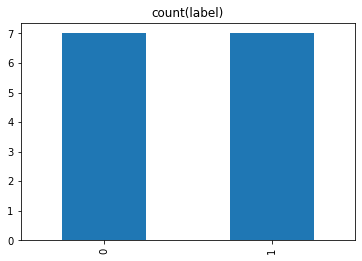

In [0]:
pd=combined_df.toPandas()['label'].value_counts()
print(pd)
pd.plot(kind="bar",title="count(label)")

+--------+-----+
|features|label|
+--------+-----+
|       d|    1|
|       e|    1|
|       y|    0|
+--------+-----+

1    2
0    1
Name: label, dtype: int64
Out[242]: <AxesSubplot:title={'center':'count(label)'}>

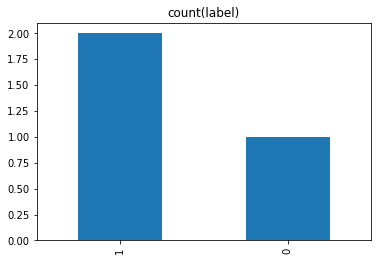

In [0]:
# DEUXIEME SOLUTION :  undersampling
sampled_majority_df=major_df.sample(False,1/ratio)

combined_df_2=sampled_majority_df.unionAll(minor_df)

combined_df_2.show()

pd=combined_df_2.toPandas()['label'].value_counts()
print(pd)
pd.plot(kind="bar",title="count(label)")

In [0]:
# Splittiong / Validation croisée ***********************************************
df1_casted.describe().show()


+-------+-------------------+------------------+------+------------------+
|summary|           Survived|            Pclass|   Sex|               Age|
+-------+-------------------+------------------+------+------------------+
|  count|                891|               891|   891|               714|
|   mean| 0.3838383838383838| 2.308641975308642|  null| 29.69911764704046|
| stddev|0.48659245426485753|0.8360712409770491|  null|14.526497332370992|
|    min|                0.0|               1.0|female|              0.42|
|    max|                1.0|               3.0|  male|              80.0|
+-------+-------------------+------------------+------+------------------+



In [0]:
df1_droup=df1_casted.dropna()
df1_droup.describe().show()

+-------+------------------+------------------+------+------------------+
|summary|          Survived|            Pclass|   Sex|               Age|
+-------+------------------+------------------+------+------------------+
|  count|               714|               714|   714|               714|
|   mean|0.4061624649859944|2.2366946778711485|  null| 29.69911764704046|
| stddev|0.4914598643353704| 0.838249862698379|  null|14.526497332370992|
|    min|               0.0|               1.0|female|              0.42|
|    max|               1.0|               3.0|  male|              80.0|
+-------+------------------+------------------+------+------------------+



In [0]:
assembler = VectorAssembler(inputCols=["Pclass","Age"],outputCol="features")
one_hot=OneHotEncoder(inputCols=["Survived"],outputCols=["Survived_enc"])
pip=Pipeline(stages=[assembler,one_hot])
df_gen=pip.fit(df1_droup).transform(df1_droup).select("features","Survived")
df_gen.show(4,truncate=True)
                                       

+----------+--------+
|  features|Survived|
+----------+--------+
|[3.0,22.0]|     0.0|
|[1.0,38.0]|     1.0|
|[3.0,26.0]|     1.0|
|[1.0,35.0]|     1.0|
+----------+--------+
only showing top 4 rows



In [0]:
# Division de data
print("nombre d'exemples de la dataset: ",df_gen.count())
train, test = df_gen.randomSplit([0.9,0.1],seed=12345)
print("nombre d'exemples apprentissage: ",train.count())
print("nombre d'exemples test: ",test.count())

nombre d'exemples de la dataset:  714
nombre d'exemples apprentissage:  661
nombre d'exemples test:  53


In [0]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


layers=[2,5,4,2]
trainer=MultilayerPerceptronClassifier(maxIter=100,layers=layers, blockSize=128,seed=1234,labelCol="Survived",featuresCol='features')

model= trainer.fit(train)

result=model.transform(test)
predictionAndLabels= result.select("prediction", "Survived")

predictionAndLabels.show(5)

+----------+--------+
|prediction|Survived|
+----------+--------+
|       1.0|     0.0|
|       1.0|     1.0|
|       1.0|     1.0|
|       1.0|     1.0|
|       1.0|     1.0|
+----------+--------+
only showing top 5 rows



In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import  RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder , TrainValidationSplit

layers=[2,5,4,2]
trainer=MultilayerPerceptronClassifier(maxIter=100,layers=layers, blockSize=128,seed=1234,labelCol="Survived",featuresCol='features')

paramGrid = ParamGridBuilder().build()
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction",labelCol="Survived")

#apprentissage
tvs = TrainValidationSplit(estimator = trainer, estimatorParamMaps=paramGrid,evaluator=evaluator , trainRatio=0.8)

model=tvs.fit(train)

In [0]:
# Classification

result= model.transform(test)
prendictionAndLabels = result. select("prediction","Survived")
prendictionAndLabels.show(5)

+----------+--------+
|prediction|Survived|
+----------+--------+
|       1.0|     0.0|
|       1.0|     1.0|
|       1.0|     1.0|
|       1.0|     1.0|
|       1.0|     1.0|
+----------+--------+
only showing top 5 rows



In [0]:
from pyspark.ml.tuning import CrossValidator
layers=[2,5,4,2]
trainer=MultilayerPerceptronClassifier(maxIter=100,layers=layers, blockSize=128,seed=1234,labelCol="Survived",featuresCol='features')
crossval = CrossValidator(estimator=trainer , estimatorParamMaps=paramGrid,evaluator =evaluator, numFolds=2)
model= crossval.fit(train)

In [0]:
#Classification
result= model.transform(test)
prendictionAndLabels = result. select("prediction","Survived")
prendictionAndLabels.show(5)

+----------+--------+
|prediction|Survived|
+----------+--------+
|       1.0|     0.0|
|       1.0|     1.0|
|       1.0|     1.0|
|       1.0|     1.0|
|       1.0|     1.0|
+----------+--------+
only showing top 5 rows

